In [53]:
from plotnine import *
import pandas as pd

In [67]:
time = "2024-01-24_20:40"
time = "2024-01-30_14:24"
# time = "2024-01-30_15:31" # classifier
time = "2024-01-31_11:30" # classifier_reg
# time = "2024-02-04_19:53" # classifier_reg
# time = "2024-02-04_22:36" # classifier_reg
# time = "2024-02-05_12:00" # reg
# time = "2024-02-05_22:08" # reg
# time = "2024-02-06_11:56" # classifier_reg
# time = "2024-02-06_14:07" # classifier_reg
# time = "2024-02-06_14:55" # classifier_reg
time = "2024-02-06_21:47" # reg

df = pd.read_csv(f"/projects/genomic-ml/da2343/ml_project_1/reproduce/results/{time}_results.csv")
# df has columns: ['Mean Squared Error', 'FoldID', 'Dataset', 'Index of Predicted Column', 'Predicted Column Name', 'Algorithm']
# drop Index of Predicted Column
df = df.drop(columns=['Index of Predicted Column'])

# group df by dataset, algorithm, and predicted column name
# find mean of mean squared error
df = df.groupby(['Dataset', 'Algorithm', 'Predicted Column Name', 'FoldID']).mean().reset_index()

df['train.groups'] = "all"

df = df.rename(columns={"Mean Squared Error": "regr.mse"})
df = df.rename(columns={"Predicted Column Name": "task_id"})
df = df.rename(columns={"FoldID": "test.fold"})
df = df.rename(columns={"Algorithm": "algorithm"})
df = df.rename(columns={"Dataset": "test.group"})
df

# save to csv
df.to_csv(f"{time}_results_R.csv", index=False)

In [ ]:

from plotnine import *
import pandas as pd

time = "2024-01-24_20:40"
time = "2024-01-30_14:24"
time = "2024-01-30_15:31" # classifier
time = "2024-01-31_11:30" # classifier_reg
time = "2024-02-04_19:53" # classifier_reg
time = "2024-02-04_22:36" # classifier_reg
time = "2024-02-05_10:50" # reg
time = "2024-02-05_12:00" # reg
time = "2024-02-05_22:08" # reg
time = "2024-02-06_11:56" # classifier_reg
time = "2024-02-06_14:07" # classifier_reg
# time = "2024-02-06_14:55" # classifier_reg
# time = "2024-02-06_15:08" # classifier_reg
time = "2024-02-06_15:45" # classifier_reg


df = pd.read_csv(f"/projects/genomic-ml/da2343/ml_project_1/reproduce/results/{time}_results.csv")
df = df.drop(columns=['Index of Predicted Column'])
df = df.rename(columns={'Predicted Column Name': 'Column_Name'})
df = df.groupby(['Dataset', 'Algorithm', 'Column_Name', 'FoldID']).mean().reset_index()
# df = df[(df['Dataset'] == "amgut1") | (df['Dataset'] == "crohns") | (df['Dataset'] == "ioral")]
# df = df[(df['Dataset'] == "crohns")]
df

In [ ]:
df = df.groupby(['Algorithm']).mean().reset_index()
df

# REGRESSION

/projects/genomic-ml/da2343/cs685/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10


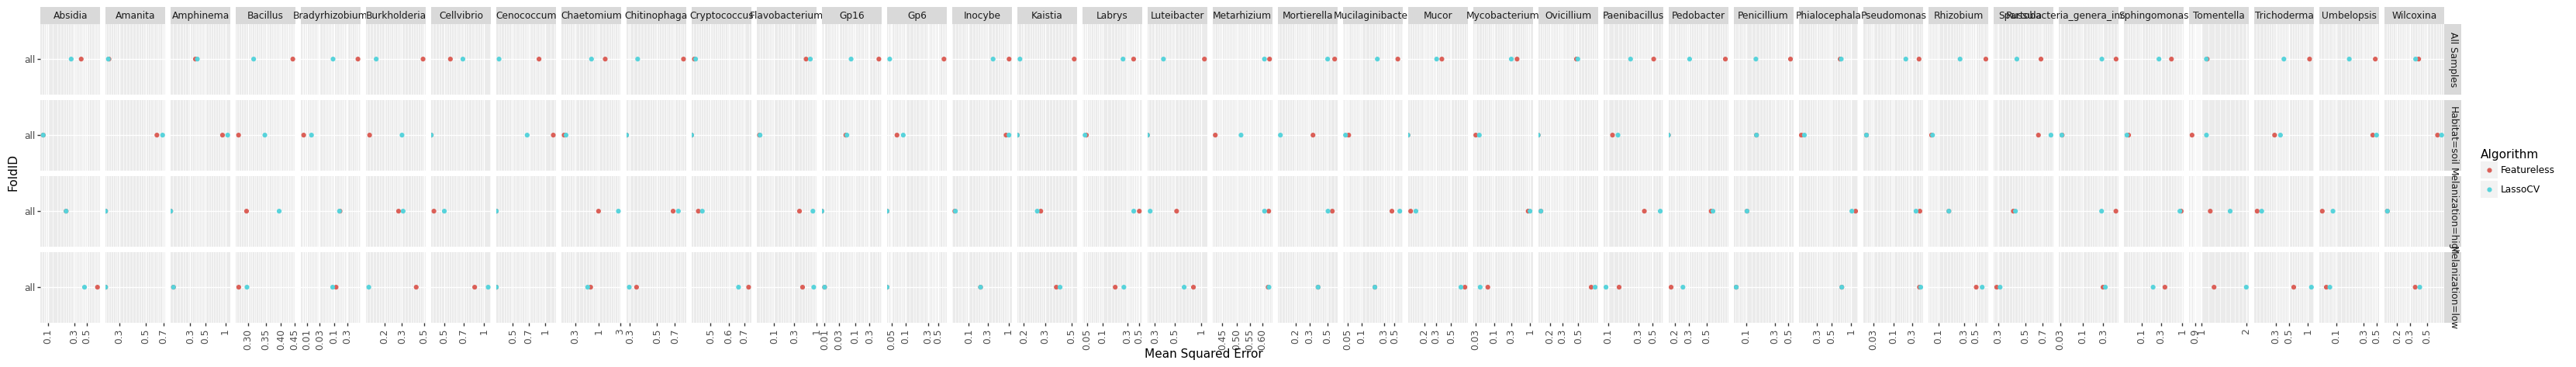

In [64]:
p = ggplot(df)
p = p + geom_point(aes(x="MSE", y="train.groups", color="Algorithm"))
p = p + facet_grid("Dataset ~ Column_Name", scales="free_x")
p = p + labs(x = "Mean Squared Error", y="FoldID")
p = p + theme(axis_text_x=element_text(angle=90), figure_size=(40, 5))
p = p + scale_x_log10()
print(p)

In [ ]:
p = ggplot(df)
p = p + geom_point(aes(x="Mean Squared Error", y="factor(FoldID)", color="Algorithm"))
p = p + facet_wrap("~ Dataset + Column_Name", scales="free_x", labeller='label_both')
p = p + labs(x = "Mean Squared Error", y="FoldID")
p = p + theme(axis_text_x=element_text(angle=90), panel_spacing=0.4, figure_size=(40, 35))
p = p + scale_x_log10()
print(p)

In [ ]:
p.save(filename = "plot.png", dpi=3000)


# CLASSIFICATION

In [ ]:

p = ggplot(log_df)
p = p + geom_point(aes(x="Test Accuracy", y="Dataset", color="Algorithm"))
p = p + facet_grid("~Predicted Column Name", scales="free")
p = p + labs(x="Accuracy", y="Dataset")
p = p + theme(axis_text_x=element_text(angle=90))
p = p + theme(figure_size=(45, 2))
# p = p + scale_x_log10()
print(p)

In [ ]:
p.save(filename = "binary_classification.png", dpi=300)

In [ ]:
from plotnine import *
import pandas as pd
import numpy as np

time = "2024-01-24_20:40"
time = "2024-01-30_14:24"
time = "2024-01-30_15:31" # classifier
time = "2024-01-31_11:30" # classifier_reg
time = "2024-02-02_11:33"

df = pd.read_csv(f"/projects/genomic-ml/da2343/ml_project_1/reproduce/results/{time}_results.csv")
# df has columns: ['Mean Squared Error', 'FoldID', 'Dataset', 'Index of Predicted Column', 'Predicted Column Name', 'Algorithm']
# drop Index of Predicted Column
df = df.drop(columns=['Index of Predicted Column'])

# convert 'FPR' and 'TPR' columns from string to array
df['FPR'] = df['FPR'].apply(lambda x:  np.fromstring(x[1:-1], sep=" ") )
df['TPR'] = df['TPR'].apply(lambda x:  np.fromstring(x[1:-1], sep=" ") )

# group df by dataset, algorithm, and predicted column name
# find mean of mean squared error
df = df.groupby(['Dataset', 'Algorithm', 'Predicted Column Name', 'FoldID']).mean().reset_index()

# filter where 'Dataset' contains 'log'
# log_df = df[df['Dataset'].str.contains('log')]

# log_df
df